<a href="https://colab.research.google.com/github/AlaseeriRawan/single-projects/blob/main/Comparative_Sequence_Analysis_of_Covid19%2C_MERS%2CSARS_and_EBOLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Comparative Sequence Analysis of Covid19, MERS,SARS and EBOLA**


* Compare their DNA sequence and Protein (Amino Acid) sequence
* GC Content
* Freq of Each Amino Acids
* Find similarity between them

* Alignment
* hamming distance
* 3D structure of each



### **Datasource**


Latest Sequence: https://www.ncbi.nlm.nih.gov/genbank/sars-cov-2-seqs/


Wuhan-Hu-1: https://www.ncbi.nlm.nih.gov/nuccore/MN908947.3?report=fasta


Covid19: https://www.ncbi.nlm.nih.gov/nuccore/NC_045512.2?report=fasta


SARS:https://www.ncbi.nlm.nih.gov/nuccore/NC_004718.3?report=fasta


MERS:https://www.ncbi.nlm.nih.gov/nuccore/NC_019843.3?report=fasta


EBOLA : https://www.ncbi.nlm.nih.gov/nuccore/NC_002549.1?report=fasta


### **PDB files**


Covid19 : https://www.rcsb.org/3d-view/6LU7


SARS: https://www.rcsb.org/structure/5XES


MERS:

EBOLA:https://www.rcsb.org/structure/6HS4

In [ ]:
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 14.1 MB/s eta 0:00:00


In [ ]:
# Load Package

from Bio.Seq import Seq

In [ ]:
seq1 = Seq("ACTGCA")
seq2 = Seq("ACT")

In [ ]:
# GC content

# firts method

from Bio.SeqUtils import GC
GC(seq1)

/usr/local/lib/python3.10/dist-packages/Bio/SeqUtils/__init__.py:144: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  warnings.warn(


50.0

In [ ]:
GC(seq2)

33.333333333333336

In [ ]:
# Second method
def gc_content(seq):
  result = float(seq.count('G')+ seq.count('C'))/len(seq)*100
  return result

In [ ]:
gc_content(seq1)

50.0

In [ ]:
gc_content(seq2)

33.33333333333333

In [ ]:
# third method
def gc_content2(seq):
  gc_count = [ N for N in seq if N in 'GC']
  result = float(len(gc_count))/len(seq) *100
  return result

In [ ]:
gc_content2(seq1)

50.0

In [ ]:
# Alignment type
# Global alignment: finds the best concordance/agreement betwenn all characters in two sequences
# Local Alignment: finds just the subsequences that align the best

In [ ]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

/usr/local/lib/python3.10/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [ ]:
dir(pairwise2)

['Alignment',
 'BiopythonDeprecationWarning',
 'BiopythonWarning',
 'MAX_ALIGNMENTS',
 '_PRECISION',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__warningregistry__',
 '_align',
 '_clean_alignments',
 '_find_gap_open',
 '_find_start',
 '_finish_backtrace',
 '_make_score_matrix_fast',
 '_make_score_matrix_generic',
 '_python_make_score_matrix_fast',
 '_python_rint',
 '_recover_alignments',
 '_reverse_matrices',
 'affine_penalty',
 'align',
 'calc_affine_penalty',
 'dictionary_match',
 'format_alignment',
 'identity_match',
 'namedtuple',
 'print_matrix',
 'rint',
 'substitution_matrices',
 'warnings']

In [ ]:
# to see alignment between two sequences:

alignments = pairwise2.align.globalxx(seq1,seq2)
alignments #looks dirty, to make it better we can add:

[Alignment(seqA='ACTGCA', seqB='ACT---', score=3.0, start=0, end=6)]

In [ ]:
# To See it well
print(format_alignment(*alignments[0]))

ACTGCA
|||   
ACT---
  Score=3



In [ ]:
# see all alignments
for a in alignments:
  print(format_alignment(*a))

ACTGCA
|||   
ACT---
  Score=3



In [ ]:
from ctypes import alignment
# only the score
alignment2 = pairwise2.align.globalxx(seq1, seq2, score_only = True, one_alignment_only = True)
print(alignment2)

3.0


In [ ]:
# to chech for the % similarity
alignment2/len(seq1)*100

50.0

In [ ]:
# Hamming distance: shows how many places 2 strings differ

# Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different.
#In other words, it measures the minimum number of substitutions required to change one string into the other, or the minimum number of errors that could have transformed one string into the othe
#It is used for error detection or error correction
#It is used to quantify the similarity of DNA sequences,
#For checking the edit distance
#edit distance is a way of quantifying how dissimilar two strings (e.g., words) are to one another by counting the minimum number of operations required to transform one string into the other.
#eg Levenshtein distance

In [ ]:
def hamdis(lhs,rhs):
  return len([(x, y) for x,y in zip(lhs, rhs) if x != y])

In [ ]:
hamdis(seq1,seq2)

0

In [ ]:
# dot plot
# Link :https://stackoverflow.com/questions/40822400/how-to-create-a-dotplot-of-two-dna-sequence-in-python
!wget "https://stackoverflow.com/questions/40822400/how-to-create-a-dotplot-of-two-dna-sequence-in-python"
# the following defs are retrieved from the link above, you dont have to write them yourself

--2023-09-19 04:30:24--  https://stackoverflow.com/questions/40822400/how-to-create-a-dotplot-of-two-dna-sequence-in-python
Resolving stackoverflow.com (stackoverflow.com)... 151.101.129.69, 151.101.65.69, 151.101.193.69, ...
Connecting to stackoverflow.com (stackoverflow.com)|151.101.129.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘how-to-create-a-dotplot-of-two-dna-sequence-in-python’

how-to-create-a-dot     [  <=>               ] 183.24K   673KB/s    in 0.3s    

2023-09-19 04:30:25 (673 KB/s) - ‘how-to-create-a-dotplot-of-two-dna-sequence-in-python’ saved [187642]



In [ ]:
def delta(x,y):
    return 0 if x == y else 1


def M(seq1,seq2,i,j,k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k],seq2[j:j+k]))


def makeMatrix(seq1,seq2,k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1,seq2,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]


def plotMatrix(M,t, seq1, seq2, nonblank = chr(0x25A0), blank = ' '):
    print(' |' + seq2)
    print('-'*(2 + len(seq2)))
    for label,row in zip(seq1,M):
        line = ''.join(nonblank if s < t else blank for s in row)
        print(label + '|' + line)


def dotplot(seq1,seq2,k = 1,t = 1):
    M = makeMatrix(seq1,seq2,k)
    plotMatrix(M, t, seq1,seq2) #experiment with character choice

In [ ]:
dotplot(seq1,seq2)

 |ACT
-----
A|■  
C| ■ 
T|  ■
G|   
C| ■ 
A|■  


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

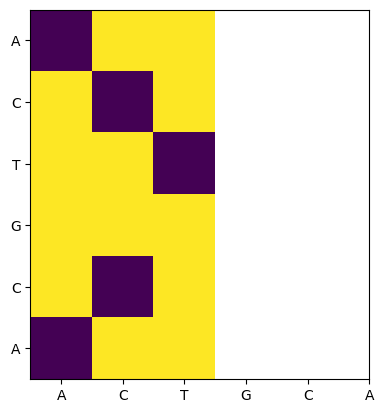

In [ ]:
# Add Some fancyness to it
plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
xt=plt.xticks(np.arange(len(list(seq1))),list(seq1))
yt=plt.yticks(np.arange(len(list(seq1))),list(seq1))
plt.show()

In [ ]:
# Convert to Fxn
def dotplotx(seq1,seq2):
    plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
    # on x-axis list all sequences of seq 2
    xt=plt.xticks(np.arange(len(list(seq2))),list(seq2))
    # on y-axis list all sequences of seq 1
    yt=plt.yticks(np.arange(len(list(seq1))),list(seq1))
    plt.show()

lets now apply all of these into the actual analysis

In [ ]:
# working with sequence than uses fasta files
from Bio import SeqIO

In [ ]:
covid = SeqIO.read("/content/Complete_covid.fasta", "fasta")
mers = SeqIO.read("/content/mers_sequence.fasta", "fasta")
sars = SeqIO.read("/content/sars_sequence.fasta", "fasta")
ebola = SeqIO.read("/content/ebola_sequence.fasta", "fasta")

In [ ]:
covid

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='NC_045512.2', name='NC_045512.2', description='NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

In [ ]:
mers

SeqRecord(seq=Seq('GATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTGCAGAACTT...AAA'), id='NC_019843.3', name='NC_019843.3', description='NC_019843.3 Middle East respiratory syndrome-related coronavirus isolate HCoV-EMC/2012, complete genome', dbxrefs=[])

In [ ]:
sars

SeqRecord(seq=Seq('ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGA...AAA'), id='NC_004718.3', name='NC_004718.3', description='NC_004718.3 SARS coronavirus Tor2, complete genome', dbxrefs=[])

In [ ]:
ebola

SeqRecord(seq=Seq('CGGACACACAAAAAGAAAGAAGAATTTTTAGGATCTTTTGTGTGCGAATAACTA...CCA'), id='NC_002549.1', name='NC_002549.1', description='NC_002549.1 Zaire ebolavirus isolate Ebola virus/H.sapiens-tc/COD/1976/Yambuku-Mayinga, complete genome', dbxrefs=[])

In [ ]:
covid_sequence = covid.seq
mers_sequence = mers.seq
sars_sequence = sars.seq
ebola_sequence = ebola.seq

In [ ]:
# sequence lenth
print("sequence length")
print("covid ",len(covid_sequence))
print("mers ",len(mers_sequence))
print("sars ",len(sars_sequence))
print("ebola ",len(ebola_sequence))

sequence length
covid  29903
mers  30119
sars  29751
ebola  18959


from the length we can see that the longest sequence is for mers followed by sars, covid, then ebola

In [ ]:
# GC content

from Bio.SeqUtils import GC
print("GC content")
print("covid ",GC(covid_sequence))
print("mers ",GC(mers_sequence))
print("sars ",GC(sars_sequence))
print("ebola ",GC(ebola_sequence))

GC content
covid  37.97277865097148
mers  41.23642883229855
sars  40.7616550704178
ebola  41.07284139458832


/usr/local/lib/python3.10/dist-packages/Bio/SeqUtils/__init__.py:144: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  warnings.warn(


the GC content of ebola and mers is higher than that of covid and sars, making ebola abd merse more stable.

In [ ]:
# protein synthesis
covid_protein = covid.seq.translate()
mers_protein = mers.seq.translate()
sars_protein = sars.seq.translate()
ebola_protein = ebola.seq.translate()

/usr/local/lib/python3.10/dist-packages/Bio/Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [ ]:
covid_protein

Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

In [ ]:
# to convert the sequence into names with 3 alphabets
from Bio.SeqUtils import seq3
seq3(covid_protein)

'IleLysGlyLeuTyrLeuProArgTerGlnThrAsnGlnLeuSerIleSerCysArgSerValLeuTerThrAsnPheLysIleCysValAlaValThrArgLeuHisAlaTerCysThrHisAlaValTerLeuIleThrAsnTyrCysArgTerGlnAspThrSerAsnSerSerIlePheCysArgLeuLeuThrValSerSerValLeuGlnProIleIleSerThrSerArgPheArgProGlyValThrGluArgTerAspGlyGluProCysProTrpPheGlnArgGluAsnThrArgProThrGlnPheAlaCysPheThrGlySerArgArgAlaArgThrTrpLeuTrpArgLeuArgGlyGlyGlyLeuIleArgGlyThrSerThrSerTerArgTrpHisLeuTrpLeuSerArgSerTerLysArgArgPheAlaSerThrTerThrAlaLeuCysValHisGlnThrPheGlyCysSerAsnCysThrSerTrpSerCysTyrGlyTerAlaGlySerArgThrArgArgHisSerValArgSerTerTrpTerAspThrTrpCysProCysProSerCysGlyArgAsnThrSerGlyLeuProGlnGlySerSerSerTerGluArgTerTerArgSerTrpTrpProTerLeuArgArgArgSerLysValIleTerLeuArgArgArgAlaTrpHisTerSerLeuTerArgPheSerArgLysLeuGluHisTerThrTerGlnTrpCysTyrProTerThrHisAlaTerAlaTerArgArgGlyIleHisSerLeuCysArgTerGlnLeuLeuTrpProTerTrpLeuProSerTerValHisTerArgProSerSerThrCysTrpTerSerPheMetHisPheValArgThrThrGlyLeuTyrTerHisTerGluGlyCysIleLeuLeuProTerThrTerAlaTerAsnCysLeuValHisGlyThrPhe

In [ ]:
# check the number of amino acid in the sequences

# method 1
from Bio.SeqUtils.ProtParam import ProteinAnalysis
covid_analyzed = ProteinAnalysis(str(covid_protein))

In [ ]:
dir(covid_analyzed)

In [ ]:
covid_analyzed.count_amino_acids()

{'A': 375,
 'C': 635,
 'D': 290,
 'E': 270,
 'F': 593,
 'G': 394,
 'H': 332,
 'I': 436,
 'K': 413,
 'L': 886,
 'M': 117,
 'N': 472,
 'P': 292,
 'Q': 325,
 'R': 558,
 'S': 810,
 'T': 679,
 'V': 548,
 'W': 263,
 'Y': 505}

In [ ]:
# Method 2
from collections import Counter

In [ ]:
covid_fq = Counter(covid_protein)
mers_fq = Counter(mers_protein)
sars_fq = Counter(sars_protein)
ebola_fq = Counter(ebola_protein)
print("AA Count:")
print("covid: ",covid_fq)
print("mers: ", mers_fq)
print("sars: ", sars_fq)
print("ebola: ",ebola_fq)


AA Count:
covid:  Counter({'L': 886, 'S': 810, '*': 774, 'T': 679, 'C': 635, 'F': 593, 'R': 558, 'V': 548, 'Y': 505, 'N': 472, 'I': 436, 'K': 413, 'G': 394, 'A': 375, 'H': 332, 'Q': 325, 'P': 292, 'D': 290, 'E': 270, 'W': 263, 'M': 117})
mers:  Counter({'L': 1711, 'S': 852, '*': 689, 'V': 651, 'I': 565, 'T': 564, 'R': 520, 'C': 506, 'F': 453, 'A': 418, 'P': 384, 'Y': 348, 'K': 345, 'H': 338, 'Q': 337, 'M': 299, 'G': 293, 'N': 285, 'W': 203, 'E': 157, 'D': 121})
sars:  Counter({'L': 1368, 'S': 737, 'T': 689, 'V': 683, 'A': 575, 'I': 566, 'K': 503, 'G': 438, 'F': 437, 'N': 418, 'R': 417, 'Q': 388, 'M': 365, 'E': 365, 'Y': 341, 'D': 320, 'P': 314, 'C': 313, 'H': 298, '*': 272, 'W': 110})
ebola:  Counter({'L': 662, 'S': 623, 'R': 437, 'T': 384, 'I': 371, 'K': 344, 'Q': 330, 'N': 294, 'P': 288, 'A': 280, 'F': 277, 'G': 277, 'V': 268, 'E': 253, '*': 249, 'H': 235, 'D': 211, 'Y': 192, 'C': 165, 'M': 91, 'W': 88})


In [ ]:
dir(plt.bar)

covid <BarContainer object of 21 artists>
mers <BarContainer object of 21 artists>
sars <BarContainer object of 21 artists>
ebola <BarContainer object of 21 artists>


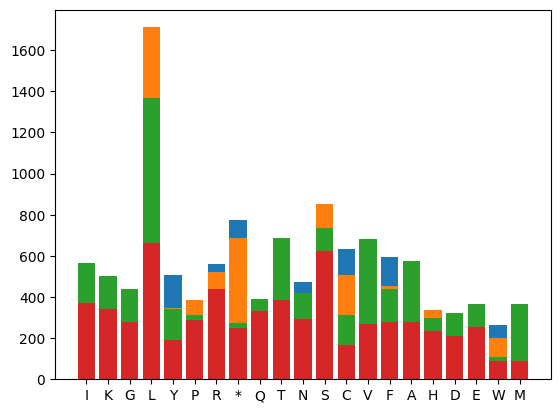

In [ ]:
# we can plot the keys against the values
from matplotlib import axes
print("covid", plt.bar(covid_fq.keys(), covid_fq.values()))
print("mers", plt.bar(mers_fq.keys(), mers_fq.values()))
print("sars", plt.bar(sars_fq.keys(), sars_fq.values()))
print("ebola", plt.bar(ebola_fq.keys(), ebola_fq.values()))

In [ ]:
print("most commont AA:")
print("covid: ", Counter(covid_protein).most_common(4))
print("mers: ", Counter(mers_protein).most_common(4))
print("sars: ", Counter(sars_protein).most_common(4))
print("ebola: ", Counter(ebola_protein).most_common(4))

most commont AA:
covid:  [('L', 886), ('S', 810), ('*', 774), ('T', 679)]
mers:  [('L', 1711), ('S', 852), ('*', 689), ('V', 651)]
sars:  [('L', 1368), ('S', 737), ('T', 689), ('V', 683)]
ebola:  [('L', 662), ('S', 623), ('R', 437), ('T', 384)]


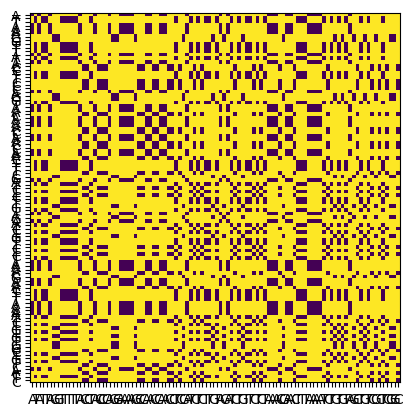

In [ ]:
#Check for molecular weigh
dotplotx(covid_sequence[:100], sars_sequence[:100])

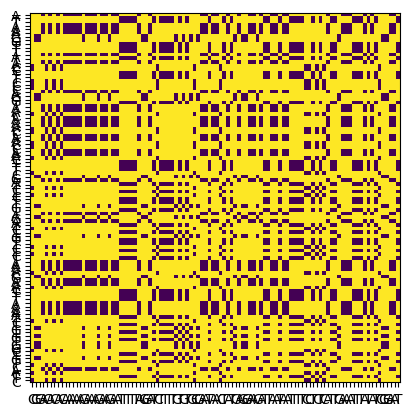

In [ ]:
dotplotx(covid_sequence[:100], ebola_sequence[:100])

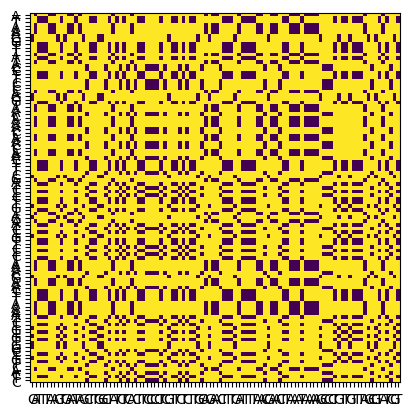

In [ ]:
dotplotx(covid_sequence[:100], mers_sequence[:100])

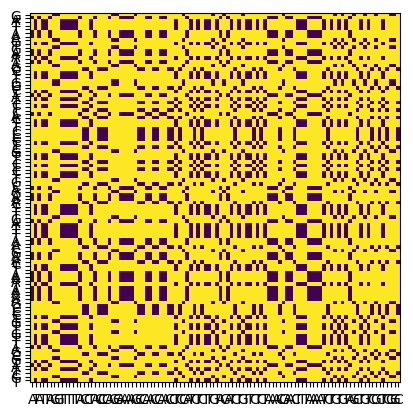

In [ ]:
dotplotx(mers_sequence[:100], sars_sequence[:100])

In [ ]:
# Pairwise alignment

cov_sars = pairwise2.align.globalxx(covid_sequence[:100], sars_sequence[:100], one_alignment_only=True, score_only=True)
cov_sars

89.0

they are almost 90% similar

In [ ]:
pairwise2.align.globalxx(covid_sequence[:100], mers_sequence[:100], one_alignment_only=True, score_only=True)

71.0

In [ ]:
pairwise2.align.globalxx(covid_sequence[:100], ebola_sequence[:100], one_alignment_only=True, score_only=True)

58.0

In [ ]:
# 3d strucure

In [ ]:
from Bio.PDB import PDBParser, MMCIFParser
parser = PDBParser()

In [ ]:
covid_structure = parser.get_structure("6lu7", "/content/6lu7.pdb")
sars_structure = parser.get_structure("5xes", "/content/5xes.pdb")
mers_structure = parser.get_structure("6war", "/content/6war.pdb")
ebola_structure = parser.get_structure("6hs4", "/content/6hs4.pdb")


In [ ]:
! pip install nglview
import nglview as nv

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
# view our structure
view_covid = nv.show_biopython(covid_structure)
view_covid

NGLWidget()

In [ ]:
view_mers = nv.show_biopython(mers_structure)
view_mers

NGLWidget()

In [ ]:
view_sars = nv.show_biopython(sars_structure)
view_sars

NGLWidget()

In [ ]:
view_ebola = nv.show_biopython(ebola_structure)
view_ebola

NGLWidget()